<a href="https://colab.research.google.com/github/oigwe-frx/Final_Project_Malaria_Detection_Full_Code/blob/main/Final_Malaria_Detection_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malaria Detection**

## <b>Problem Definition</b>

### **The Context:**
Malaria is a contagious disease caused by <i>Plasmodium parasites</i> transmitted by a parasite-carrying <i>Anopheles</i> mosquito. According to the World Health Organization's Annual Malaria Report (2023), despite global strides in providing preventative measures and interventional responses, more cases of malaria were reported in 2022 compared to 2019 [1].

Almost 50% of the world’s population is in danger from malaria. In 2019, there were over 229 million reported cases and 400,000 deaths, with children under 5 years old being the most vulnerable. "In 2022, there were an estimated 249 million malaria cases globally, exceeding the pre-pandemic level of 233 million in 2019 by 16 million cases" [2]. In 2019, 400,000 malaria-related deaths were reported globally.

According to the CDC, "microscopic [blood] examination remains the “gold standard” for laboratory confirmation of malaria" [3]. Traditional laboratory diagnosis of a malaria infection involves a series of steps that require trained professionals to examine blood samples under a microscope and identify the presence of <i>Plasmodium parasites</i>. According to medlineplus.gov, to obtain a definitive negative result from a microscopic test, "blood samples are usually taken every 12-24 hours for a total of 3 sets of tests" [4]. In addition to the 36-81 hours needed to perform the test, significant human effort must be invested. The efficacy of microscopic malaria diagnosis in a laboratory can vary depending on several factors, including the experience of the laboratory technician, the workload of the laboratory, and the complexity of the case.

The application of deep learning algorithms in malaria detection offers a powerful and versatile tool for improving the accuracy, speed, and efficiency of diagnosis while reducing the reliance on human expertise. These benefits can lead to earlier treatment, better patient outcomes, and more effective management of malaria in regions where it is prevalent.

***Citations***:<br/>
[1]: "Switzerland : WHOs Annual Malaria Report Spotlights the Growing Threat of Climate Change." MENA Report, vol. , no. , 2023, p. .<br/>
[2]: "Switzerland : WHOs Annual Malaria Report Spotlights the Growing Threat of Climate Change." MENA Report, vol. , no. , 2023, p. . <br/>
[3]: Anjorin, Emmanuel T., et al. "Overtreatment of Malaria in the Nigerian Healthcare Setting; Prescription Practice, Rationale and Consequences." The Pan African Medical Journal, 2023,  https://doi.org/10.11604/pamj.2023.45.111.31780. <br/>
[4]: Malaria Tests: MedlinePlus Medical Test. https://medlineplus.gov/lab-tests/malaria-tests/ <br/>


### **The Objectives:**

The objective is to build an efficient computer vision model to detect malaria. The model will be trained to differentiate whether an image of a red blood cell is one that is infected with malaria (classify the cell as parasitized or uninfected).

### **The Key Questions:**

***Data Collection***:

- What is the source of the dataset for training and testing the algorithm?
- How large and diverse is the dataset?

***Data Preprocessing***:

- What techniques are required for image augmentation, normalization, and enhancement?

***Model Architecture***:

- What deep learning architecture should be chosen for the algorithm?
- How many layers and neurons should the model have?

***Hyperparameter Tuning***:

- How should the training process be optimized to prevent overfitting or underfitting?

***Class Imbalance***:

- How can class imbalance issues be addressed if there are significant differences in the number of parasitized and uninfected samples?

***Performance Metrics***:

- What is the acceptable level of false positives or false negatives in malaria detection?

***Real-time Processing***:

- Can the deep learning algorithm be optimized for real-time or near-real-time processing of blood smear images?

***Scalability and Generalization***:

- Can the algorithm be generalized to different populations, regions, and healthcare settings?
- How can the algorithm adapt to variations in image quality and conditions?

### **The Problem Formulation:**
Develop an automated deep learning-based system for the detection of malaria parasites in blood smear images to enhance the accuracy and efficiency of diagnosis, particularly in resource-constrained regions with limited access to skilled technicians and healthcare facilities.

## <b>Data Description </b>

There are a total of 24,958 training and 2,600 test images (colored) that have been taken from microscopic images. These images are of the following categories:<br>

**Parasitized:** The parasitized cells contain the Plasmodium parasite which causes malaria.<br>
**Uninfected:** The uninfected cells are free of the Plasmodium parasites.



###<b> Mount the Drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <b>Loading libraries</b>

In [30]:
# Library for randomly selecting data points
import random

# Libraries for performing numerical computations
import numpy as np
import pandas as pd

# Library for creating and showing plots
import matplotlib.pyplot as plt
import seaborn as sns

# Library to interact with the operating system
import os

# Open Source Computer Vision Library
import cv2

# TensorFlow modules
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
)
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

# scikit-learn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import regularizers

# Torchvision modules
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Zipfile
import zipfile

# Operating System Interface
import os

# Libraries for Image Padding
from PIL import Image, ImageOps

# Library to add progress bars to loops - tracking progress
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")


### <b>Loading the data</b>

In [31]:
# Specify the path to the uploaded ZIP file
zip_file_path = '/content/drive/MyDrive/cell_images.zip'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

The extracted folder has different folders for train and test data will contain the different sizes of images for parasitized and uninfected cells within the respective folder name.

The size of all images must be the same and should be converted to 4D arrays so that they can be used as an input for the convolutional neural network.

In [32]:
# Define the path to dataset directory
data_dir = '/content/cell_images'

# Define the common size for all images
image_size = (128, 128)

# Initialize empty lists for images and labels
images = []
labels = []

# Define the subfolders for training and testing
subfolders = ['train', 'test']

for subfolder in subfolders:
    for folder_name in os.listdir(os.path.join(data_dir, subfolder)):
        if folder_name == 'parasitized':
            label = 1  #  Label 1 for infected images
        elif folder_name == 'uninfected':
            label = 0  #  Label 0 for uninfected images
        else:
            continue  # Skip other folders

        folder_path = os.path.join(data_dir, subfolder, folder_name)

        for filename in tqdm(os.listdir(folder_path)):
            file_path = os.path.join(folder_path, filename)
            try:
                # Open and resize the image
                img = Image.open(file_path)
                img = img.resize(image_size)
                img = np.array(img)

                # Append the image and label to the lists
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

100%|██████████| 1300/1300 [00:03<00:00, 429.26it/s]


###<b> Check the shape of train and test images

In [33]:
# Print the shapes of the arrays (for verification)
print("Training Images shape:", X_train.shape)
print("Testing Images shape:", X_test.shape)

Training Images shape: (22046, 128, 128, 3)
Testing Images shape: (5512, 128, 128, 3)


###<b> Check the shape of train and test labels

In [34]:
# Print the shapes of the arrays (for verification)
print("Training Labels shape:", y_train.shape)
print("Testing Labels shape:", y_test.shape)

Training Labels shape: (22046,)
Testing Labels shape: (5512,)


####<b> Observations and insights: _____ </b>

  There are a total of 22,046 training and 5,512 test images
  - Each image has a shape of (128, 128, 3), which means they are 128 pixels in width, 128 pixels in height, and have 3 color channels.








### <b>Check the minimum and maximum range of pixel values for train and test images

In [35]:
# Calculate the minimum and maximum pixel values for training images
train_min_pixel = X_train.min()
train_max_pixel = X_train.max()

# Calculate the minimum and maximum pixel values for testing images
test_min_pixel = X_test.min()
test_max_pixel = X_test.max()

# Print the minimum and maximum pixel values for training images
print("Minimum pixel value for training images:", train_min_pixel)
print("Maximum pixel value for training images:", train_max_pixel)

# Print the minimum and maximum pixel values for testing images
print("Minimum pixel value for testing images:", test_min_pixel)
print("Maximum pixel value for testing images:", test_max_pixel)

Minimum pixel value for training images: 0
Maximum pixel value for training images: 255
Minimum pixel value for testing images: 0
Maximum pixel value for testing images: 255


####<b> Observations and insights: _____ </b>

Minimum pixel value for training images: 0
Maximum pixel value for training images: 255
Minimum pixel value for testing images: 0
Maximum pixel value for testing images: 255



###<b> Count the number of values in both uninfected and parasitized

In [36]:
# Assuming y_train and y_test are numeric, with 0 representing 'uninfected' and 1 'parasitized'
num_uninfected_train = sum(y_train == 0)
num_parasitized_train = sum(y_train == 1)

num_uninfected_test = sum(y_test == 0)
num_parasitized_test = sum(y_test == 1)

print("Training set - Uninfected:", num_uninfected_train, "Parasitized:", num_parasitized_train)
print("Testing set - Uninfected:", num_uninfected_test, "Parasitized:", num_parasitized_test)


Training set - Uninfected: 10895 Parasitized: 11151
Testing set - Uninfected: 2781 Parasitized: 2731


###<b>Normalize the images

In [37]:
# Normalize the training and testing images
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Print the minimum and maximum pixel values after normalization
print("Minimum pixel value in normalized training images:", X_train_normalized.min())
print("Maximum pixel value in normalized training images:", X_train_normalized.max())
print("Minimum pixel value in normalized testing images:", X_test_normalized.min())
print("Maximum pixel value in normalized testing images:", X_test_normalized.max())


Minimum pixel value in normalized training images: 0.0
Maximum pixel value in normalized training images: 1.0
Minimum pixel value in normalized testing images: 0.0
Maximum pixel value in normalized testing images: 1.0


####<b> Observations and insights: _____</b>

Minimum pixel value in normalized training images: 0.0
Maximum pixel value in normalized training images: 1.0
Minimum pixel value in normalized testing images: 0.0
Maximum pixel value in normalized testing images: 1.0

### <b>Data Exploration


####<b> Plot to check if the data is balanced

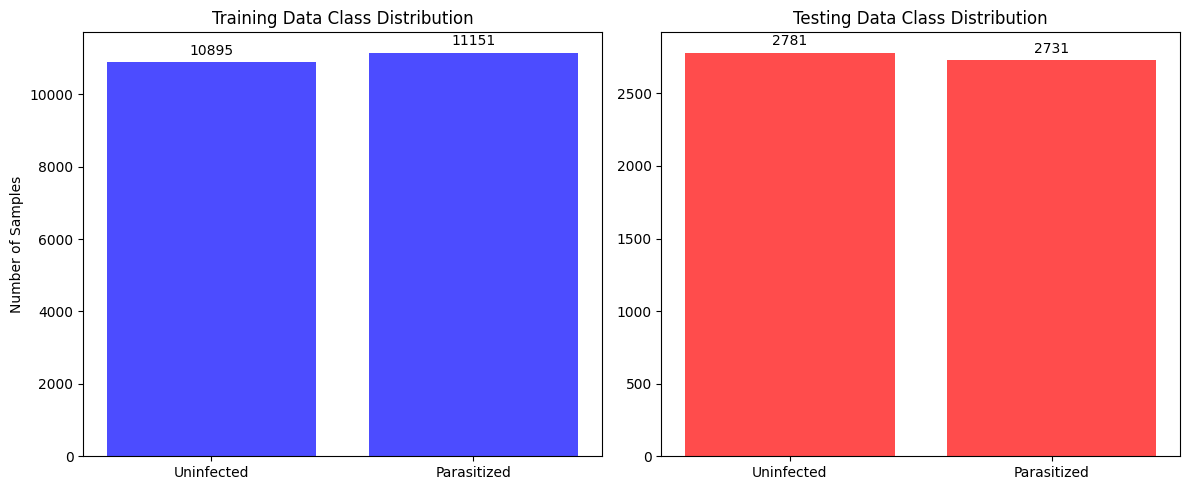

In [39]:
train_class_counts = np.bincount(y_train)
test_class_counts = np.bincount(y_test)

class_labels = ['Uninfected', 'Parasitized']

plt.figure(figsize=(12, 5))

# Training data plot
plt.subplot(1, 2, 1)
bars = plt.bar(class_labels, train_class_counts, color='b', alpha=0.7)
plt.title('Training Data Class Distribution')
plt.ylabel('Number of Samples')
for bar, count in zip(bars, train_class_counts):
    height = bar.get_height()
    plt.annotate('{}'.format(count),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

# Testing data plot
plt.subplot(1, 2, 2)
bars = plt.bar(class_labels, test_class_counts, color='r', alpha=0.7)
plt.title('Testing Data Class Distribution')
for bar, count in zip(bars, test_class_counts):
    height = bar.get_height()
    plt.annotate('{}'.format(count),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()


#####<b> Observations and insights: _____</b>
- Training Data:
  - Uninfected count: 10895
  - Parasitized count: 11151
- Testing Data:
 - Uninfected count: 2781
  - Parasitized count: 2731

####<b> Visualize the images with subplot(6, 6) and figsize = (12, 12)

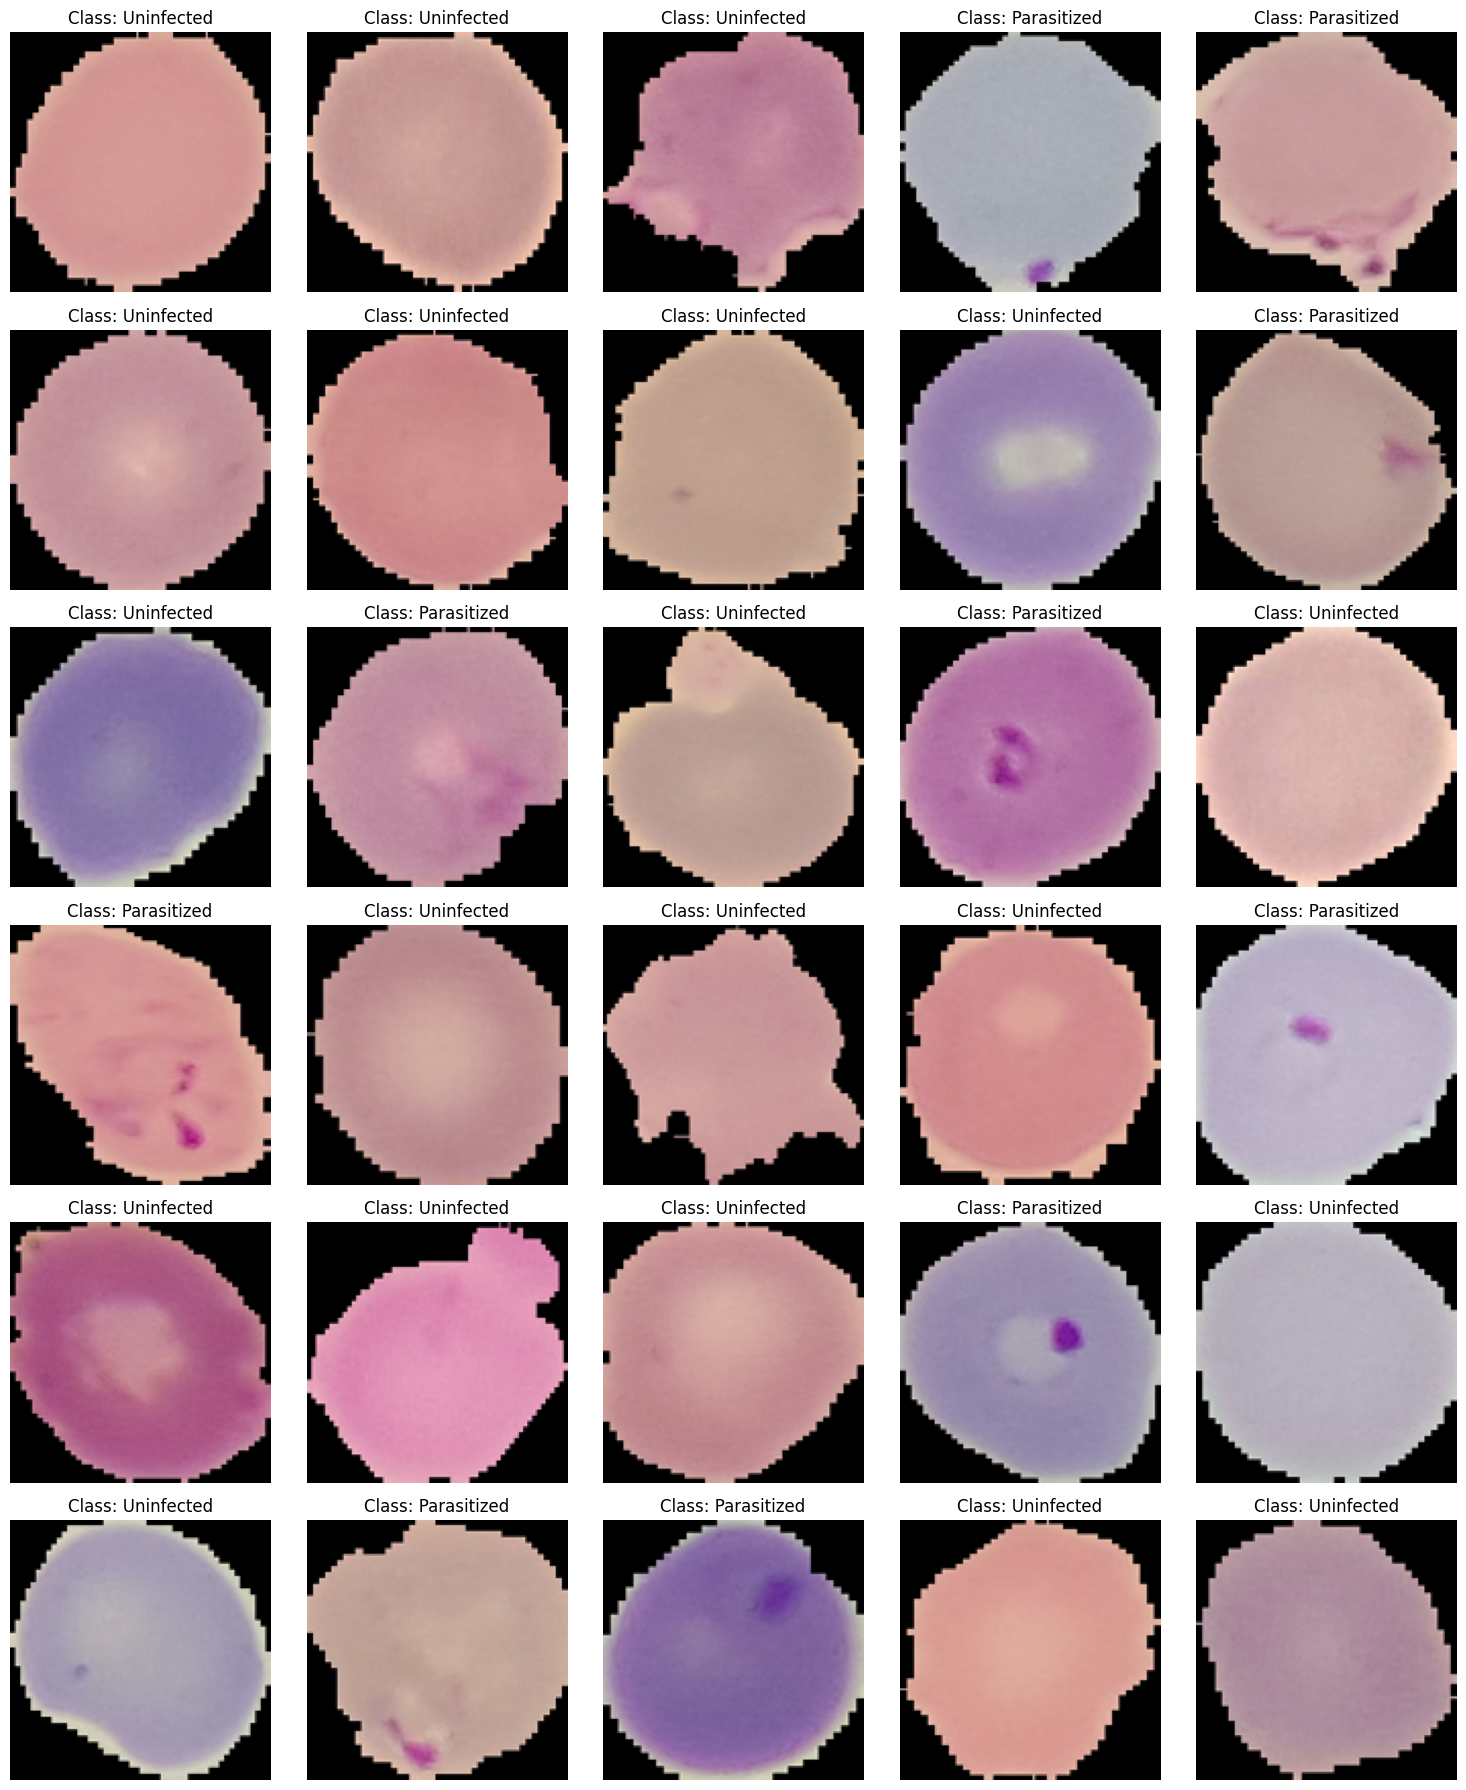

In [45]:
# Ensure reproducibility
random.seed(42)

# Number of images to display
num_images_to_display = 30

# Desired number of rows
num_rows = 6

# Calculate the number of columns needed to display the desired number of images over 6 rows
num_columns = num_images_to_display // num_rows + (num_images_to_display % num_rows > 0)

plt.figure(figsize=(num_columns * 3, num_rows * 3))  # Adjusted figsize for better visibility

for i in range(num_images_to_display):
    # Select a random image and label
    random_index = random.randint(0, len(X_train) - 1)
    image = X_train[random_index]
    label = y_train[random_index]

    # Plot
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(image)
    plt.title(f"Class: {'Parasitized' if label == 1 else 'Uninfected'}")


    plt.axis('off')

plt.tight_layout()
plt.show()


#####<b>Observations and insights: </b>

**General Observations**:
- Sample Variability: There is a diversity of images within the training set. Each cell displayed has its own unique color pattern, shape, and location/distribution of parasite.
- Rotation: Each cell, due to its shape, is position differently. Thus the location of the parasite is oriented uniquely.

**Parasitized Cells**:

- Parasitized cells contain one or more malaria parasites inside them.
- The parasites, known as Plasmodium, appear as small, dark-stained structures within the red blood cells.
- Parasitized cells exhibit changes in shape due to the presence of the parasites.
The presence of malaria pigment (hemozoin) can lead to the appearance of dark granules within parasitized cells.

**Uninfected Cells:**

- Uninfected cells do not contain malaria parasites.
- Uninfected cells maintain their characteristic disc shape and a uniform, clear appearance.

####<b> Plotting the mean images for parasitized and uninfected

In [46]:
# Calculate the mean image for parasitized (infected) cells
mean_infected_image = np.mean(X_train[y_train == 1], axis=0)

# Calculate the mean image for uninfected cells
mean_uninfected_image = np.mean(X_train[y_train == 0], axis=0)

# Create a subplot for the mean images
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<b> Mean image for parasitized

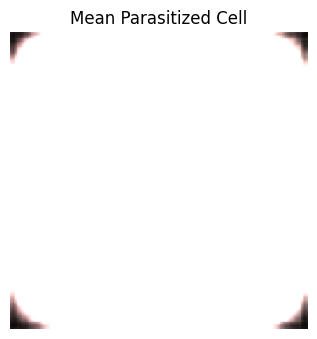

In [52]:
# Plotting the mean image for parasitized cells
plt.subplot(1, 2, 1)
plt.imshow(mean_infected_image.astype('float32'))  # Ensure the pixel values are in the correct data type for displaying
plt.title('Mean Parasitized Cell')
plt.axis('off')

plt.tight_layout()
plt.show()

<b> Mean image for uninfected

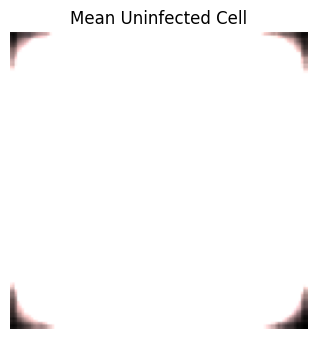

In [53]:
# Plotting the mean image for uninfected cells
plt.subplot(1, 2, 2)
plt.imshow(mean_uninfected_image.astype('float32'))
plt.title('Mean Uninfected Cell')
plt.axis('off')

plt.tight_layout()
plt.show()

#####<b> Observations and insights: _____</b>

- Although the images look quite similar, there is a nuance in color saturation and color distribution. Care must be used when evaluating the data, as not accounting for the color nuance could grately skew the results.

### <b>Converting RGB to HSV of Images using OpenCV

###<b> Converting the train data

In [ ]:
# Create an empty list to store the converted HSV images
X_train_hsv = []

# Loop through each RGB image in the training data
for rgb_image in X_train:
    # Convert RGB to HSV
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    X_train_hsv.append(hsv_image)

# Convert the list of HSV images to a numpy array
X_train_hsv = np.array(X_train_hsv)

# Print the shape of the resulting HSV images
print("Shape of HSV training images:", X_train_hsv.shape)

# Number of HSV images to display
num_images_to_display = 5
# Create a subplot for the images
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    # Select a random index from the test dataset
    random_index = random.randint(0, len(X_train_hsv) - 1)

    # Get the HSV image at the selected index
    hsv_image = X_train_hsv[random_index]

    # Create a subplot for each image
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(hsv_image, cmap='hsv')
    plt.title(f"Test Image {random_index}")
    plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

###<b> Converting the test data

In [ ]:
# Create an empty list to store the converted HSV images for the test data
X_test_hsv = []

# Loop through each RGB image in the test data
for rgb_image in X_test:
    # Convert RGB to HSV
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    X_test_hsv.append(hsv_image)

# Convert the list of HSV images to a numpy array
X_test_hsv = np.array(X_test_hsv)

# Print the shape of the resulting HSV images
print("Shape of HSV testing images:", X_test_hsv.shape)

# Number of HSV images to display
num_images_to_display = 5

# Create a subplot for the images
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    # Select a random index from the test dataset
    random_index = random.randint(0, len(X_test_hsv) - 1)

    # Get the HSV image at the selected index
    hsv_image = X_test_hsv[random_index]

    # Create a subplot for each image
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(hsv_image, cmap='hsv')
    plt.title(f"Test Image {random_index}")
    plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

####<b>Observations and insights: _____</b>

The HSV (Hue, Saturation, Value) color space can be advantageous for emphasizing specific features or traits of cells that may not be as apparent in the RGB (Red, Green, Blue) color space. For instance, it proves valuable in tasks such as distinguishing objects based on their color or detecting subtle variations in color within an image.

In the context of malaria-infected cells, the HSV color space can be particularly informative. It often reveals that the parasitic area of the cells appears as a complementary color when compared to the uninfected portion of the cell. This contrast can aid in identifying and studying the infected regions within the cells more effectively.

###<b> Processing Images using Gaussian Blurring

###<b> Gaussian Blurring on train data

In [ ]:
# Define the kernel size for Gaussian blur
kernel_size = (5, 5)

# Apply Gaussian blur to training images and store in X_train_blurred
X_train_blurred = [cv2.GaussianBlur(img, kernel_size, 0) for img in X_train_hsv]

# Number of blurred images to display
num_images_to_display = 5

# Create a subplot for the blurred training images
plt.figure(figsize=(15, 5))
plt.suptitle('Blurred Training Images', fontsize=16)
for i in range(num_images_to_display):
    # Select a random index from the training dataset
    random_index = random.randint(0, len(X_train_blurred) - 1)

    # Get the blurred HSV image at the selected index
    blurred_hsv_image = X_train_blurred[random_index]

    # Convert the blurred HSV image back to RGB for display
    blurred_rgb_image = cv2.cvtColor(blurred_hsv_image, cv2.COLOR_HSV2RGB)

    # Create a subplot for each blurred training image
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(blurred_rgb_image)
    plt.title(f"Train Image {random_index}")
    plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

###<b> Gaussian Blurring on test data

In [ ]:
# Define the kernel size for Gaussian blur
kernel_size = (5, 5)

# Apply Gaussian blur to training images and store in X_train_blurred
X_test_blurred = [cv2.GaussianBlur(img, kernel_size, 0) for img in X_train_hsv]

# Number of blurred images to display
num_images_to_display = 5

# Create a subplot for the blurred training images
plt.figure(figsize=(15, 5))
plt.suptitle('Blurred Training Images', fontsize=16)
for i in range(num_images_to_display):
    # Select a random index from the training dataset
    random_index = random.randint(0, len(X_train_blurred) - 1)

    # Get the blurred HSV image at the selected index
    blurred_hsv_image = X_test_blurred[random_index]

    # Convert the blurred HSV image back to RGB for display
    blurred_rgb_image = cv2.cvtColor(blurred_hsv_image, cv2.COLOR_HSV2RGB)

    # Create a subplot for each blurred training image
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(blurred_rgb_image)
    plt.title(f"Train Image {random_index}")
    plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

####**Observations and insights: _____**

**Think About It:**

Blurring could be a double-edged sword when it comes to parasite detection.
- Noise Reduction: Blurring can help reduce noise, which can improve the overall quality of the images. Cleaner images can make it easier for the detection of the parasites.
- Loss of Detail: On the other hand, excessive blurring can lead to a loss of fine details in the image. If the parasites are small and subtle, aggressive blurring might make them less visible and hinder detection.

Other visual maniulation technique:
- Super-Resolution: Super-resolution techniques can enhance image resolution, potentially making small parasites or structures more visible.







## **Model Building**

### **Base Model**

**Note:** The Base Model has been fully built and evaluated with all outputs shown to give an idea about the process of the creation and evaluation of the performance of a CNN architecture. A similar process can be followed in iterating to build better-performing CNN architectures.

###<b> Importing the required libraries for building and training our Model

In [ ]:
# Library for randomly selecting data points
import random

# Libraries for performing numerical computations
import numpy as np
import pandas as pd

# Library for creating and showing plots
import matplotlib.pyplot as plt
import seaborn as sns

# Library to interact with the operating system
import os

# Open Source Computer Vision Library
import cv2

# TensorFlow modules
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import (
    Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU, MaxPooling2D
)
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Module for loading and displaying images
from tensorflow.keras.preprocessing import image

# Module for one-hot encoding labels
from tensorflow.keras.utils import to_categorical

# Module for plotting model architectures
from tensorflow.keras.utils import plot_model

# scikit-learn modules
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Torchvision modules
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# Zipfile
import zipfile

# Operating System Interface
import os

# Libraries for Image Padding
from PIL import Image, ImageOps

# Library to add progress bars to loops - tracking progress
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")


####<B>One Hot Encoding the train and test labels

In [ ]:
# One-hot encode the train labels
num_classes = 2  #  Two classes (infected and uninfected)
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes)

# One-hot encode the test labels
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes)

###<b> Building the model

In [ ]:
# Create a Sequential model
model = Sequential()

# Define the input shape based on HSV image dimensions
input_shape = (128, 128, 3)

# Add a Convolutional layer with 32 filters, a 3x3 kernel, and 'relu' activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))

# Add a MaxPooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional layer with 64 filters, a 3x3 kernel, and 'relu' activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add a fully connected layer with 128 units and 'relu' activation
model.add(Dense(128, activation='relu'))

# Add dropout to reduce overfitting
model.add(Dropout(0.5))

# Add the output layer with 2 units (for binary classification) and 'softmax' activation
model.add(Dense(2, activation='softmax'))

# Display the model summary
model.summary()


###<b> Compiling the model

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

<b> Using Callbacks

In [ ]:
# Define a ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint("best_model.h5", save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# Define an EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

# Define a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# Define a learning rate schedule function (e.g., reduce by half every 10 epochs)
def lr_schedule(epoch):
    initial_learning_rate = 0.001
    if epoch < 10:
        return initial_learning_rate
    else:
        return initial_learning_rate * 0.5

# Create a LearningRateScheduler callback
lr_scheduler_callback = LearningRateScheduler(lr_schedule)

# Define a ReduceLROnPlateau callback
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

<b> Fit and train our Model

In [ ]:
history = model.fit(
    X_train,
    y_train_encoded,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test_encoded),
    callbacks=[checkpoint_callback, early_stopping_callback, tensorboard_callback, lr_scheduler_callback, reduce_lr_callback]
)

###<b> Evaluating the model on test data

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

<b> Plotting the confusion matrix

In [ ]:
y_pred = model.predict(X_test)

# Convert one-hot encoded predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Generate a classification report
classification_report_result = classification_report(y_true_classes, y_pred_classes)

# Generate a confusion matrix
confusion_matrix_result = confusion_matrix(y_true_classes, y_pred_classes)

<b>Plotting the train and validation curves

In [ ]:
# Extract training and validation loss and accuracy from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### <b>Observation:</b>

1. Training Accuracy: The training accuracy increasing and approaching 100% suggests that the model is able to fit the training data. However, there is a slightly erratic pattern:

  - Initial Sharp Climb: At the beginning of training, the model is learning and adapting quickly to the training data. It starts with low accuracy and rapidly improves as it fits the training data more closely.
  - Small Window of Climbing: This phase might be a period where the model continues to improve and learn from the training data, albeit at a slower pace. The accuracy curve shows some fluctuations or plateaus during this time.
  - Plummet Back to 0: The sudden drop to near-zero accuracy is a strong indicator of overfitting. Overfitting occurs when the model has learned to memorize the training data instead of generalizing from it. It becomes too specialized and fails to perform well on unseen data (validation or test data).
  - Sharp Incline Back Up: The model starts to "recover" from overfitting as training continues. This can happen because the model's weights are being updated during training, and it starts to generalize better.
  - Steady Climb: In this phase, the model continues to improve its performance on the training data while also generalizing well to unseen data. The accuracy steadily increases.

2. Validation Accuracy Stagnation: The validation accuracy remaining stagnant and not improving suggests that the model's performance on unseen or validation data is not getting better, even though it's improving on the training data.
  - This often means that the model is not generalizing well to new, unseen data.
  - The phenomenon of overfitting occurs when a model becomes too complex and starts fitting the noise or random variations in the training data, rather than learning the underlying patterns. As a result, the model performs well on the training data but poorly on new, unseen data because it has essentially memorized the training dataset.

So now let's try to build another model with few more add on layers and try to check if we can try to improve the model. Therefore try to build a model by adding few layers if required and altering the activation functions.

###<b> Model 1
####<b> Trying to improve the performance of our model by adding new layers


In [ ]:
# Clear the backend session to release resources
backend.clear_session()

# Fixing the seed for random number generators to ensure reproducibility
np.random.seed(42)       # Fixing seed for NumPy random number generator
random.seed(42)          # Fixing seed for Python's random module
tf.random.set_seed(42)   # Fixing seed for TensorFlow's random operations

# Suppressing warnings
warnings.filterwarnings("default")

###<b> Building the Model

In [ ]:
# Define hyperparameters and regularization strength
learning_rate = 1e-4
num_epochs = 20
batch_size = 32
dropout_rate = 0.5
l2_regularization = 1e-4

# Create a function to build the model
def create_model(input_shape):
    model = Sequential()

    # Convolutional Layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2_regularization)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l2_regularization)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten and fully connected layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_regularizer=l2(l2_regularization)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128, activation='relu', kernel_regularizer=l2(l2_regularization)))
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

###<b> Compiling the model

In [ ]:
# Held within the "Build the Model" function (above)

<b> Using Callbacks

In [ ]:
# Held within the "Fit and Train the model" (below)

<b>Fit and Train the model

In [ ]:
# Initialize stratified k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_scores = []

# Iterate through cross-validation splits
for train_idx, val_idx in kfold.split(X_train, y_train):
    # Split the data
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train_encoded[train_idx], y_train_encoded[val_idx]

    # Create and compile the model
    model = create_model(input_shape)

    # Early stopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluate the model on the validation data
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(accuracy)


###<b> Evaluating the model

In [ ]:
# Calculate the mean and standard deviation of cross-validation scores
mean_accuracy = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)

print(f"Mean CV Accuracy: {mean_accuracy * 100:.2f}%")
print(f"Standard Deviation of CV Accuracy: {std_accuracy * 100:.2f}%")

<b> Plotting the confusion matrix

In [ ]:
y_pred_classes = np.argmax(model.predict(X_val_fold), axis=1)
y_true_classes = np.argmax(y_val_fold, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['Uninfected', 'Infected'], yticklabels=['Uninfected', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax output to class labels

# Convert one-hot encoded labels to class labels
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['Uninfected', 'Infected'])


<b> Plotting the train and the validation curves

In [ ]:
# Access the training history
history = model.fit(
    X_train_fold,
    y_train_fold,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_val_fold, y_val_fold),
    callbacks=[early_stopping],
    verbose=1
)

# Extract training and validation loss and accuracy from the history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

###<b>Think about it:</b><br>
Now let's build a model with LeakyRelu as the activation function  

*  Can the model performance be improved if we change our activation function to LeakyRelu?
*  Can BatchNormalization improve our model?

Let us try to build a model using BatchNormalization and using LeakyRelu as our activation function.

###<b> Model 2 with Batch Normalization

In [ ]:
# Clear the backend session to release resources
backend.clear_session()

# Fixing the seed for random number generators to ensure reproducibility
np.random.seed(42)       # Fixing seed for NumPy random number generator
random.seed(42)          # Fixing seed for Python's random module
tf.random.set_seed(42)   # Fixing seed for TensorFlow's random operations

# Suppressing warnings
warnings.filterwarnings("default")

###<b> Building the Model

In [ ]:
# Create a new Sequential model
new_model = Sequential()

# Define the input shape based on HSV image dimensions
input_shape = (128, 128, 3)

# Add a Convolutional layer with 32 filters, a 3x3 kernel, BatchNormalization, and LeakyReLU activation
new_model.add(Conv2D(32, (3, 3), input_shape=input_shape))
new_model.add(BatchNormalization())
new_model.add(LeakyReLU(alpha=0.1))

# Add a MaxPooling layer with a 2x2 pool size
new_model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional layer with 64 filters, a 3x3 kernel, BatchNormalization, and LeakyReLU activation
new_model.add(Conv2D(64, (3, 3)))
new_model.add(BatchNormalization())
new_model.add(LeakyReLU(alpha=0.1))

# Add another MaxPooling layer with a 2x2 pool size
new_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
new_model.add(Flatten())

# Add a fully connected layer with 128 units, BatchNormalization, and LeakyReLU activation
new_model.add(Dense(128))
new_model.add(BatchNormalization())
new_model.add(LeakyReLU(alpha=0.1))

# Add dropout to reduce overfitting
new_model.add(Dropout(0.5))

# Add the output layer with 2 units (for binary classification) and 'softmax' activation
new_model.add(Dense(2, activation='softmax'))

# Display the new model summary
new_model.summary()

###<b>Compiling the model

In [ ]:
# Compile the model
optimizer = Adam(learning_rate=1e-4)
new_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

<b> Using callbacks

In [ ]:
# Define callbacks
model_checkpoint = ModelCheckpoint(
    'best_model.h5',  # Save the best model to this file
    save_best_only=True,  # Save only the best model
    monitor='val_loss',  # Monitor validation loss
    mode='min',  # Minimize validation loss
    verbose=1  # Display messages
)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Stop training if no improvement for 10 epochs
    restore_best_weights=True,  # Restore weights of the best model
    verbose=1  # Display messages
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,  # Reduce learning rate by half when triggered
    patience=3,  # Number of epochs with no improvement before reducing LR
    verbose=1  # Display messages
)

<b>Fit and train the model

In [ ]:
# Split training data into training and validation sets
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(
    X_train, y_train_encoded, test_size=0.2, random_state=42
)

# Train the model with callbacks
history = new_model.fit(
    X_train,
    y_train_encoded,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val_encoded),
    callbacks=[model_checkpoint, early_stopping, reduce_lr],
    verbose=1
)

<b>Plotting the train and validation accuracy

In [ ]:
# Extract training and validation accuracy from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


###<b>Evaluating the model

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = new_model.evaluate(X_test, y_test_encoded, verbose=1)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

####<b>Observations and insights: ____</b>

- Test Performance*: Model 2 achieved a test loss of 0.1599 and a test accuracy of 95.05%, indicating strong generalization to unseen data. The f1-score of 0.95 for both classes suggests a balanced performance in terms of precision and recall.
- Training and Validation Accuracy: During training, the model's training accuracy steadily increased from 0.7384 to 0.9961, while the validation accuracy also grew from 0.5295 to 0.9449.
- Overfitting, there is some evidence of it in Model 2. The training accuracy consistently outpaces the validation accuracy, and the large gap between training and validation accuracy in the later stages of training suggests that the model has learned the training data too well, leading to overfitting. EarlyStopping and ReduceLROnPlateau callbacks help mitigate this by stopping training when validation loss stalls, but there is still room for improvement.

<b> Generate the classification report and confusion matrix

In [ ]:
# Make predictions on the test data
y_pred = new_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax output to class labels

# Convert one-hot encoded labels to class labels
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['Uninfected', 'Infected'])

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Print the classification report
print(report)

# Print the confusion matrix
print(confusion_mtx)


###**Think About It :**<br>

* Can we improve the model with Image Data Augmentation?
* References to image data augmentation can be seen below:
  *   [Image Augmentation for Computer Vision](https://www.mygreatlearning.com/blog/understanding-data-augmentation/)
  *   [How to Configure Image Data Augmentation in Keras?](https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/)





###<b>Model 3 with Data Augmentation

In [ ]:
# Clear the backend session to release resources
backend.clear_session()

# Fixing the seed for random number generators to ensure reproducibility
np.random.seed(42)       # Fixing seed for NumPy random number generator
random.seed(42)          # Fixing seed for Python's random module
tf.random.set_seed(42)   # Fixing seed for TensorFlow's random operations

# Suppressing warnings
warnings.filterwarnings("default")

###<b> Use image data generator

In [ ]:
# Create an instance of the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=40,  # Randomly rotate images by up to 40 degrees
    width_shift_range=0.2,  # Randomly shift the width by up to 20% of the image width
    height_shift_range=0.2,  # Randomly shift the height by up to 20% of the image height
    shear_range=0.2,  # Randomly apply shear transformations
    zoom_range=0.2,  # Randomly zoom in and out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill missing pixels using the nearest available pixel
)

###**Think About It :**<br>

*  Check if the performance of the model can be improved by changing different parameters in the ImageDataGenerator.



####<B>Visualizing Augmented images

In [ ]:
# Load an example image
img_path = '/content/drive/MyDrive/cell_images/test/parasitized/C39P4thinF_original_IMG_20150622_105253_cell_105.png'
img = image.load_img(img_path)
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)  # Reshape to (1, height, width, channels)

# Generate augmented images
plt.figure(figsize=(10, 10))
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.subplot(3, 3, i + 1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 9 == 0:  # Display 9 augmented images
        break

plt.show()


####<b>Observations and insights: ____</b>

- The example cell images can either be low or high image quality
- The color variation is clear. The images are consistently colored
- The image sizes are all the same dimension
- The images do not have any noise, the backgrounds are solid black
- There does not seem to be any stains or smudges that can impat the analysis
- Due to the intense zoomed-in effect, some of the slide examples parasitized, but a distinct parasite spot could not be seen by the eye

###<b>Building the Model

In [ ]:
# Define constants
input_shape = (128, 128, 3)  # Adjust based on image dimensions
num_classes = 2  # Number of classes (e.g., 'Infected' and 'Uninfected')
batch_size = 32
num_epochs = 20


# Create an instance of the ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])



<b>Using Callbacks

In [ ]:
# Define callback parameters
model_checkpoint = ModelCheckpoint(
    'best_model.h5',  # Save the best model to this file
    save_best_only=True,  # Save only the best model
    monitor='val_loss',  # Monitor validation loss
    mode='min',  # Minimize validation loss
    verbose=1  # Display messages
)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Stop training if no improvement for 10 epochs
    restore_best_weights=True,  # Restore weights of the best model
    verbose=1  # Display messages
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,  # Reduce learning rate by half when triggered
    patience=3,  # Number of epochs with no improvement before reducing LR
    verbose=1  # Display messages
)


<b> Fit and Train the model

In [ ]:
# Split training data into training and validation sets
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(
    X_train, y_train_encoded, test_size=0.2, random_state=42
)

# Create a data generator for training with data augmentation
train_generator = datagen.flow(X_train, y_train_encoded, batch_size=batch_size)


# Train the model with augmented data
history = model.fit(train_generator,
                    steps_per_epoch=len(X_train) // batch_size,
                    epochs=num_epochs,
                    validation_data=(X_val, y_val_encoded),
                    callbacks=[model_checkpoint, early_stopping, reduce_lr]
                    )


# Evaluate the model on the test dataset (X_test, y_test_encoded)
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded, verbose=1)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

###<B>Evaluating the model

<b>Plot the train and validation accuracy

In [ ]:
# Extract training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of epochs for the x-axis
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<B>Plotting the classification report and confusion matrix

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax output to class labels

# Convert one-hot encoded labels to class labels
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['Uninfected', 'Infected'])

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Print the classification report
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Uninfected', 'Infected'],
            yticklabels=['Uninfected', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

<b> Now, let us try to use a pretrained model like VGG16 and check how it performs on our data.

### **Pre-trained model (VGG16)**
- Import VGG16 network upto any layer you choose
- Add Fully Connected Layers on top of it

In [ ]:
# Define a custom input shape
custom_input_shape = (128, 128, 3)

# Load the VGG16 model with pre-trained weights (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=custom_input_shape))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Choose a layer from the base model to serve as the new top layer
chosen_layer = base_model.get_layer('block5_pool')

# Create a new model that includes the base model up to the chosen layer
new_model = Model(inputs=base_model.input, outputs=chosen_layer.output)

# Add fully connected layers on top of the chosen layer
x = Flatten()(new_model.output)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

# Create the final model
final_model = Model(inputs=new_model.input, outputs=output)

# Print the model summary
final_model.summary()

###<b>Compiling the model

In [ ]:
# Compile the model and specify the optimizer, loss function, and metrics
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


<b> using callbacks

In [ ]:
# Define callback parameters
model_checkpoint = ModelCheckpoint(
    'best_model.h5',  # Save the best model to this file
    save_best_only=True,  # Save only the best model
    monitor='val_loss',  # Monitor validation loss
    mode='min',  # Minimize validation loss
    verbose=1  # Display messages
)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,  # Stop training if no improvement for 10 epochs
    restore_best_weights=True,  # Restore weights of the best model
    verbose=1  # Display messages
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,  # Reduce learning rate by half when triggered
    patience=3,  # Number of epochs with no improvement before reducing LR
    verbose=1  # Display messages
)

<b>Fit and Train the model

In [ ]:
# Train the model
history = final_model.fit( X_train,
    y_train_encoded,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val_encoded),
    verbose=1,
    callbacks=[model_checkpoint, early_stopping, reduce_lr])

<b>Plot the train and validation accuracy

In [ ]:
# Extract training and validation accuracy from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Create a range of epochs for the x-axis
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


# Make predictions on the test data
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax output to class labels

# Convert one-hot encoded labels to class labels
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['Uninfected', 'Infected'])

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Print the classification report
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Uninfected', 'Infected'],
            yticklabels=['Uninfected', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


###**Observations and insights: _____**

*   What can be observed from the validation and train curves?
- Test Performance: Model 4 achieved an impressive f1-score of 0.97 for both classes, indicating a strong balance between precision and recall. The validation accuracy started at 96.51% and ended at 96.85%, while the training accuracy started at 95.02% and ended at 99.98%. Training was stopped early, suggesting that the model had already converged and further training was not necessary.



###<b> Evaluating the model

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = final_model.evaluate(X_test, y_test_encoded, verbose=2)

# Print the test loss and accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

<b>Plotting the classification report and confusion matrix

In [ ]:
# Make predictions on the test data
y_pred = final_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax output to class labels

# Convert one-hot encoded labels to class labels
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=['Uninfected', 'Infected'])

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true_classes, y_pred_classes)

# Print the classification report
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Uninfected', 'Infected'],
            yticklabels=['Uninfected', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

###<b>Think about it:</b>
*  What observations and insights can be drawn from the confusion matrix and classification report?
  - In summary, the reports suggests that the model performs well for both "Uninfected" and "Infected" classes, with high precision, recall, and F1-scores. The overall accuracy is also excellent, and the model is robust in handling class imbalance.

*  Choose the model with the best accuracy scores from all the above models and save it as a final model.
  - The final model is Model 3: The Image Data Augmentation Model


####<b> Observations and Conclusions drawn from the final model: _____</b>

Overall, Model 4 performed exceptionally well, achieving high accuracy, an excellent f1-score, and a well-balanced confusion matrix. The early stopping indicates that the model reached its optimal performance quickly during training.



**Improvements that can be done:**<br>


*  Can the model performance be improved using other pre-trained models or different CNN architecture?
*  You can try to build a model using these HSV images and compare them with your other models.

In [ ]:
# Create an empty list to store the converted HSV images
X_train_hsv = []

# Loop through each RGB image in the training data
for rgb_image in X_train:
    # Convert RGB to HSV
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    X_train_hsv.append(hsv_image)

# Convert the list of HSV images to a numpy array
X_train_hsv = np.array(X_train_hsv)

# Print the shape of the resulting HSV images
print("Shape of HSV training images:", X_train_hsv.shape)

# Number of HSV images to display
num_images_to_display = 5
# Create a subplot for the images
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    # Select a random index from the test dataset
    random_index = random.randint(0, len(X_train_hsv) - 1)

    # Get the HSV image at the selected index
    hsv_image = X_train_hsv[random_index]

    # Create a subplot for each image
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(hsv_image, cmap='hsv')
    plt.title(f"Test Image {random_index}")
    plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

In [ ]:
# Create an empty list to store the converted HSV images for the test data
X_test_hsv = []

# Loop through each RGB image in the test data
for rgb_image in X_test:
    # Convert RGB to HSV
    hsv_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)
    X_test_hsv.append(hsv_image)

# Convert the list of HSV images to a numpy array
X_test_hsv = np.array(X_test_hsv)

# Print the shape of the resulting HSV images
print("Shape of HSV testing images:", X_test_hsv.shape)

# Number of HSV images to display
num_images_to_display = 5

# Create a subplot for the images
plt.figure(figsize=(15, 5))
for i in range(num_images_to_display):
    # Select a random index from the test dataset
    random_index = random.randint(0, len(X_test_hsv) - 1)

    # Get the HSV image at the selected index
    hsv_image = X_test_hsv[random_index]

    # Create a subplot for each image
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(hsv_image, cmap='hsv')
    plt.title(f"Test Image {random_index}")
    plt.axis('off')  # Turn off axis labels

plt.tight_layout()
plt.show()

In [ ]:
# MODEL 1

# Clear the backend session to release resources
backend.clear_session()

# Fixing the seed for random number generators to ensure reproducibility
np.random.seed(42)       # Fixing seed for NumPy random number generator
random.seed(42)          # Fixing seed for Python's random module
tf.random.set_seed(42)   # Fixing seed for TensorFlow's random operations

# Suppressing warnings
warnings.filterwarnings("default")

# Calculate class weights manually
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create a Sequential model
model = Sequential()

# Add the first Convolutional layer with 32 filters, a 3x3 kernel, and 'relu' activation
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))

# Add a MaxPooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Convolutional layer with 64 filters, a 3x3 kernel, and 'relu' activation
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add another MaxPooling layer with a 2x2 pool size
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add a fully connected layer with 128 units and 'relu' activation
model.add(Dense(128, activation='relu'))

# Add dropout to reduce overfitting
model.add(Dropout(0.5))

# Add the output layer with 2 units (for binary classification) and 'softmax' activation
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Display the model summary
model.summary()

# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Convert class_weights array to a dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train the model
history = model.fit(
    X_train_hsv,
    y_train_encoded,
    validation_split=0.2,
    epochs=32,
    batch_size=32,
    callbacks=[model_checkpoint, early_stopping, reduce_lr],
    verbose=1,
    class_weight=class_weights_dict
)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_hsv, y_test_encoded)

# Print test loss and accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate classification report
y_pred = model.predict(X_test_hsv)
y_pred_classes = np.argmax(y_pred, axis=1)
target_names = ['Uninfected', 'Parasitized']
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred_classes, target_names=target_names))

# Generate confusion matrix
confusion_mtx = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# MODEL 2

# Clear the backend session to release resources
backend.clear_session()

# Fixing the seed for random number generators to ensure reproducibility
np.random.seed(42)       # Fixing seed for NumPy random number generator
random.seed(42)          # Fixing seed for Python's random module
tf.random.set_seed(42)   # Fixing seed for TensorFlow's random operations

# Suppressing warnings
warnings.filterwarnings("default")

# Calculate class weights manually
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create a Sequential model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))  # L2 regularization
model.add(Dropout(0.7))  # Increased dropout rate
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

model.summary()

# Define callbacks
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Convert class_weights array to a dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Train the model
history = model.fit(
    X_train_hsv,
    y_train_encoded,
    validation_split=0.2,
    epochs=32,
    batch_size=32,
    callbacks=[model_checkpoint, early_stopping, reduce_lr],
    verbose=1,
    class_weight=class_weights_dict
)

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_hsv, y_test_encoded)

# Print test loss and accuracy
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Generate classification report
y_pred = model.predict(X_test_hsv)
y_pred_classes = np.argmax(y_pred, axis=1)
target_names = ['Uninfected', 'Parasitized']
print(classification_report(np.argmax(y_test_encoded, axis=1), y_pred_classes, target_names=target_names))

# Generate confusion matrix
confusion_mtx = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### **Insights**

####**Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**Class Distribution**:
  - The class distribution for the dataset, which consists of 24,958 training images and 2,600 test images, is as follows:
    - Training Set:
      - Parasitized Class: 12,583 items
      - Uninfected Class: 12,377 items
    - Test Set:
      - Parasitized Class: 1,301 items
      - Uninfected Class: 1,301 items

**Image Size**:
- In the dataset, the images vary in size, with the largest image being 36,865 bytes (equivalent to 41 KB on disk). This particular image is a parasitized training cell and has dimensions of 364 pixels in width and 340 pixels in height.
- Conversely, the smallest image in the dataset is a mere 1,418 bytes and measures 55 pixels in width and 40 pixels in height. It's worth noting that all images in the dataset are in PNG format and consist of three color channels (RGB).
- To ensure consistency in analysis and processing, all these images were uniformly normalized to a resolution of 128 x 128 pixels, maintaining the three color channels. This standardization aids in facilitating efficient and consistent image analysis and classification tasks.

**Data Augmentation**:
- Among the various techniques employed, the data augmentation method involving the use of the ImageDataGenerator class yielded the most promising results. This technique was configured with several augmentation parameters to enhance the dataset, including:
  - Rotation Range of 40 degrees
  - Width Shift Range of 0.2
  - Height Shift Range of 0.2
  - Shear Range of 0.2
  - Zoom Range of 0.2
  - Horizontal Flip
  - Fill Mode set to 'nearest'
By applying these augmentation strategies, the model benefited from increased training data diversity and robustness. This, in turn, contributed to the model's improved performance, making it the preferred choice for enhancing the dataset and achieving better results in image classification tasks.

**Correlations**:
  - Parasitized Cells:
    - Parasitized cells are characterized by the presence of one or more malaria parasites within them.
    - These parasites, scientifically known as Plasmodium, manifest as small, dark-stained structures within the red blood cells.
    - The presence of these parasites often leads to noticeable alterations in the shape of the infected cells.
    - Additionally, the accumulation of malaria pigment, known as hemozoin, can result in the appearance of dark granules within parasitized cells.
  - Uninfected Cells:
    - In contrast, uninfected cells are devoid of malaria parasites.
    - These uninfected cells maintain their distinctive disc-like shape and exhibit a uniform, clear appearance throughout the image analysis.


####**Comparison of various techniques and their relative performance**:

**Analysis of Base Model (Sequential CNN)**:
- **Model Compilation:** The model was compiled using binary cross-entropy loss and the Adam optimizer, with accuracy as the evaluation metric.
- **Architecture:** The base model is a Sequential Convolutional Neural Network (CNN) consisting of eight layers.
  - Dropout layer with a dropout rate of 0.5, applied to the output (None, 128).
Dense output layer with 2 units, corresponding to binary classification.
- **Training and Validation Accuracy:** During testing, the model achieved a test accuracy of 60.79% and a test loss of 0.6596.
- **Overfitting**:
  - Training Accuracy: The training accuracy steadily increases over epochs, which is a typical sign of a model learning the training data very well. This suggests that the model is capable of fitting the training data closely.
  - Validation Accuracy: However, the validation accuracy remains lower and relatively stagnant, hovering around 60%. This indicates that the model does not perform as well on data it has not seen during training. In other words, it fails to generalize to unseen examples.
  - Gap Between Training and Validation Accuracy: There is a significant gap between the training and validation accuracy curves. When the training accuracy is substantially higher than the validation accuracy, it's a strong indicator of overfitting.

---

**Analysis of Model 1 (Sequential CNN)**:

-  **Model Compilation**: Model 1 was compiled using binary cross-entropy loss, the Adam optimizer, and accuracy as the evaluation metric.
- **Architecture**: It comprises 12 layers, which include convolutional layers, max-pooling layers, dense layers, and dropout layers.
- **Techniques**: Model 1 used k-fold cross-validation and L2 regularization with a coefficient of 1e-4.
  - Cross-Validation Results: The mean cross-validation accuracy achieved by Model 1 is 97.46%, with a low standard deviation of 0.24%. This indicates that the model performs consistently well across different validation sets.
  - Confusion Matrix: The confusion matrix for Model 1 shows that it has a high true positive rate for both classes. It correctly identified 2159 uninfected samples and 2145 infected samples, with only 39 uninfected samples and 66 infected samples being misclassified.
- **Training and Validation Accuracy**: During training, the model's training accuracy steadily increased from 0.9863 to 0.9978, indicating that it learned the training data effectively. However, the validation accuracy, while high (ranging from 0.9746 to 0.9796), showed some erratic behavior and stagnation. This suggests that the model might have slightly overfitted the data, as the training accuracy continued to improve while the validation accuracy did not follow the same trend.
- **Overall**: Model 1 demonstrates strong performance, with high accuracy and robustness as indicated by cross-validation results. However, there is a slight indication of overfitting, which could be addressed with further regularization or architectural adjustments.

---

**Analysis of Model 2 with Batch Normalization and LeakyReLU**:

- **Model Compilation**: Model 2 was compiled using binary cross-entropy loss and the Adam optimizer with a learning rate of 1e-4. The evaluation metric used was accuracy.
- **Architecture**: It is a 14-layer sequential CNN with the incorporation of batch normalization and LeakyReLU activation functions.
- **Callbacks**: Model 2 used three callbacks: ModelCheckpoint to save the best model based on validation loss, EarlyStopping to stop training if there is no improvement in validation loss for 10 epochs, and ReduceLROnPlateau to reduce the learning rate by half if the validation loss stagnates.
**Test Performance**: Model 2 achieved a test loss of 0.1599 and a test accuracy of 95.05%, indicating strong generalization to unseen data. The f1-score of 0.95 for both classes suggests a balanced performance in terms of precision and recall.
- **Training and Validation Accuracy**: During training, the model's training accuracy steadily increased from 0.7384 to 0.9961, while the validation accuracy also grew from 0.5295 to 0.9449.
- **Overfitting**, there is some evidence of it in Model 2. The training accuracy consistently outpaces the validation accuracy, and the large gap between training and validation accuracy in the later stages of training suggests that the model has learned the training data too well, leading to overfitting. EarlyStopping and ReduceLROnPlateau callbacks help mitigate this by stopping training when validation loss stalls, but there is still room for improvement.

---

**Analysis of Model 3 with Data Augmentation**:

- **Model Compilation**: Model 3 was compiled using binary cross-entropy loss and the Adam optimizer with a learning rate of 1e-4. The evaluation metric used was accuracy.
- **Data Augmentation**: Data augmentation was applied using an ImageDataGenerator with various transformations such as rotation, width and height shifts, shear, zoom, horizontal flip, and nearest fill mode.
- **Callbacks**: Model 3 used three callbacks: ModelCheckpoint to save the best model based on validation loss, EarlyStopping to stop training if there is no improvement in validation loss for 10 epochs, and ReduceLROnPlateau to reduce the learning rate by half if the validation loss stagnates.
- **Training Process**: The training data was split into training and validation sets with a 80-20 split. Data augmentation was applied to the training set using the ImageDataGenerator. The model was trained for 20 epochs.
- **Test Performance**: Model 3 achieved a test loss of 0.0735 and a test accuracy of 97.99%, indicating strong generalization to unseen data. The f1-score of 0.98 for both classes suggests a balanced performance in terms of precision and recall.
- **Validation Accuracy**: The validation accuracy steadily increased from an initial value of 0.9476 to a final value of 0.9744 over the training epochs.
- **Confusion Matrix**: The confusion matrix reveals that the model correctly classified 2643 uninfected samples as uninfected and 2758 parasitized samples as parasitized. There were 46 false positives (uninfected samples classified as parasitized) and 65 false negatives (parasitized samples classified as uninfected).

**Overall, Model 3 with data augmentation performed exceptionally well, achieving high accuracy and a balanced f1-score. It also showed improvement in validation accuracy, suggesting effective generalization. The confusion matrix demonstrates that the model made relatively few misclassifications**.

---

**Analysis of Model 4 - Pretrained VGG16 with Additional Layers**

- **Model Architecture**: Model 4 is based on the pretrained VGG16 architecture with additional layers added on top of the 'block5_pool' layer. It includes two dense layers with 516 and 256 units, respectively. The final model was compiled using the Adam optimizer and binary cross-entropy loss, with accuracy as the evaluation metric.
- **Callbacks**: Three callbacks were utilized during training. ModelCheckpoint saved the best model based on validation loss, EarlyStopping stopped training if there was no improvement in validation loss for 10 epochs, and ReduceLROnPlateau reduced the learning rate by a factor of 0.5 if the validation loss stagnated for 3 consecutive epochs.
- **Test Performance**: Model 4 achieved an impressive f1-score of 0.97 for both classes, indicating a strong balance between precision and recall. The validation accuracy started at 96.51% and ended at 96.85%, while the training accuracy started at 95.02% and ended at 99.98%. Training was stopped early, suggesting that the model had already converged and further training was not necessary.
- **Confusion Matrix**: The confusion matrix shows that the model correctly classified 2596 uninfected samples as uninfected and 2752 parasitized samples as parasitized. There were 93 false positives (uninfected samples classified as parasitized) and 71 false negatives (parasitized samples classified as uninfected).

**Overall, Model 4 performed exceptionally well, achieving high accuracy, an excellent f1-score, and a well-balanced confusion matrix. The early stopping indicates that the model reached its optimal performance quickly during training.**

---

**Analysis of Model 5: HSV CNN: Poor Performance**

---

**Analysis of Model 6 with HSV Images**:

- **Model Architecture**: Model 6 is a Sequential CNN model with 8 layers. It was compiled using binary cross-entropy loss and the Adam optimizer with a learning rate of 0.0001. The evaluation metric used was accuracy.
- **Class Weights**: Class weights were calculated using the 'balanced' option, and they were applied during training to account for class imbalance.
- **Callbacks**: Model 6 used three callbacks: ModelCheckpoint to save the best model based on validation loss, EarlyStopping to stop training if there is no improvement in validation loss for 10 epochs, and ReduceLROnPlateau to reduce the learning rate by a factor of 0.2 if the validation loss stagnates for 5 consecutive epochs.
- **Test Performance**: Model 6 achieved a test loss of 0.1852 and a test accuracy of 93.87%, indicating strong generalization to unseen data. The f1-score of 0.94 for both classes suggests a balanced performance in terms of precision and recall.
- **Confusion Matrix**: The confusion matrix reveals that the model correctly classified 2484 uninfected samples as uninfected and 2690 parasitized samples as parasitized. There were 205 false positives (uninfected samples classified as parasitized) and 133 false negatives (parasitized samples classified as uninfected).
- **Overall**: Model 6 performed well, achieving high accuracy and a balanced f1-score. The confusion matrix demonstrates that the model made relatively few misclassifications, considering the class imbalance.









####**Proposal for the final solution design**:
- What model do you propose to be adopted? Why is this the best solution to adopt?

**Model 4 - Pretrained VGG16 with Additional Layers** performed the best among the models. Here are some reasons for this conclusion:

High Test Performance: Model 4 achieved a high f1-score of 0.97 for both classes, indicating strong performance in terms of both precision and recall on the test dataset.

Good Generalization: The model showed good generalization as seen in the consistent performance on the validation dataset, with a final validation accuracy of 96.85%.

Early Stopping: The fact that training was stopped early suggests that the model converged quickly and did not require additional training epochs, indicating efficient training.

Balanced Confusion Matrix: The confusion matrix showed a relatively balanced distribution of true positives and true negatives, with a low number of false positives and false negatives.

Overall, Model 4 demonstrated strong performance, good generalization, and efficient training, making it the top-performing model among those analyzed.


Model 4, the Pretrained VGG16 with Additional Layers, may have outperformed Model 3 with Data Augmentation for several reasons:

- **Transfer Learning**: Model 4 utilized a pretrained VGG16 base, which is a well-established and powerful convolutional neural network (CNN) architecture pretrained on a large dataset. Transfer learning allows the model to leverage features learned from a diverse set of images, which can be highly beneficial when dealing with limited data like in medical imaging.

- **Architectural Complexity**: Model 4 added additional layers on top of the VGG16 base, which increased its architectural complexity. This extra capacity may have allowed the model to learn more complex and discriminative features from the data.

- **Early Stopping**: Model 4 training was stopped early, suggesting that it converged quickly and efficiently. This is a positive sign, as it indicates that the model learned from the data without overfitting.

- **Consistent Validation Performance**: Model 4 showed consistent and strong performance on the validation dataset throughout training, with validation accuracy increasing from 96.51% to 96.85%. This indicates that the model was not overfitting and maintained good generalization.

- **Balanced Confusion Matrix**: The confusion matrix for Model 4 showed a relatively balanced distribution of true positives and true negatives, indicating that the model was making accurate predictions for both classes.

- **Use of Pretrained Weights**: The use of pretrained weights from VGG16 as initialization can help the model converge faster and find better features in the data.

While Data Augmentation (Model 3) is a valuable technique to increase the effective size of the training dataset and improve model generalization, it seems that the combination of transfer learning, architectural complexity, and early stopping contributed to the superior performance of Model 4 in this specific case. However, the choice of the best model may also depend on other factors such as computational resources and the specific requirements of the application.


